In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
matplotlib.rcParams['text.usetex'] = True
from scipy.optimize import curve_fit as fit

plt.style.use('../plotstyle.txt')
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator

Below is the code for some graphs I made to accompany my Monte Carlo analysis.

In [2]:
# Global constants
e = 1.6*10**-19 #C
epsilon_0 = 8.85*10**-12 #Fm^-1
epsilon_r = 77.21
k_B = 1.380649*10**-23 #Jmol^-1
T = 300 #K
b = 6.76e-10 #m
a = 7.35e-10/b
K = e**2/(4*np.pi*epsilon_0*epsilon_r*k_B*T*b)

In [3]:
#Fitting function to the partition function... empirically shown to be the best (by trial and error)
def func(x, a, b, c, d):
    return a * np.exp(b * x) + c + d*np.sqrt(x)

In [4]:
#Function which find the force according to the best fit partition function (and the formula described above)
def find_force(xarray, partition_function, res):
    dx = xarray[1] - xarray[0]
    smoothxarray = np.linspace(xarray[0], xarray[-1], res*len(xarray))
    popt, pcov = fit(func, xarray, partition_function, bounds=([-1000, -50, -200, 0], [1000., 0., 100, 100]))
    smooth_partition_function = func(smoothxarray, *popt)
    force = np.gradient(smooth_partition_function)*res/(K*dx)
    return smooth_partition_function, smoothxarray, force

In [5]:
#Loading data
partitions = np.load("data/partitions_N=20_M=500_fractions.npy")
distance = np.load("data/distances_N=20_M=500_fractions.npy")

In [6]:
#Smoothening data
resolution = 5 #how many times we want it to be more resolved
Ny = np.shape(partitions)[0]
Nx = np.shape(partitions)[1]
smooth_partitions = np.zeros((Ny, Nx*resolution))
smooth_distance = np.zeros((Ny, Nx*resolution))
forces = np.zeros((Ny, Nx*resolution))
for i in range(len(partitions)):
    smooth_partitions[i] = find_force(distance[i], partitions[i], resolution)[0]
    smooth_distance[i] = find_force(distance[i], partitions[i], resolution)[1]
    forces[i] = find_force(distance[i], partitions[i], resolution)[2]

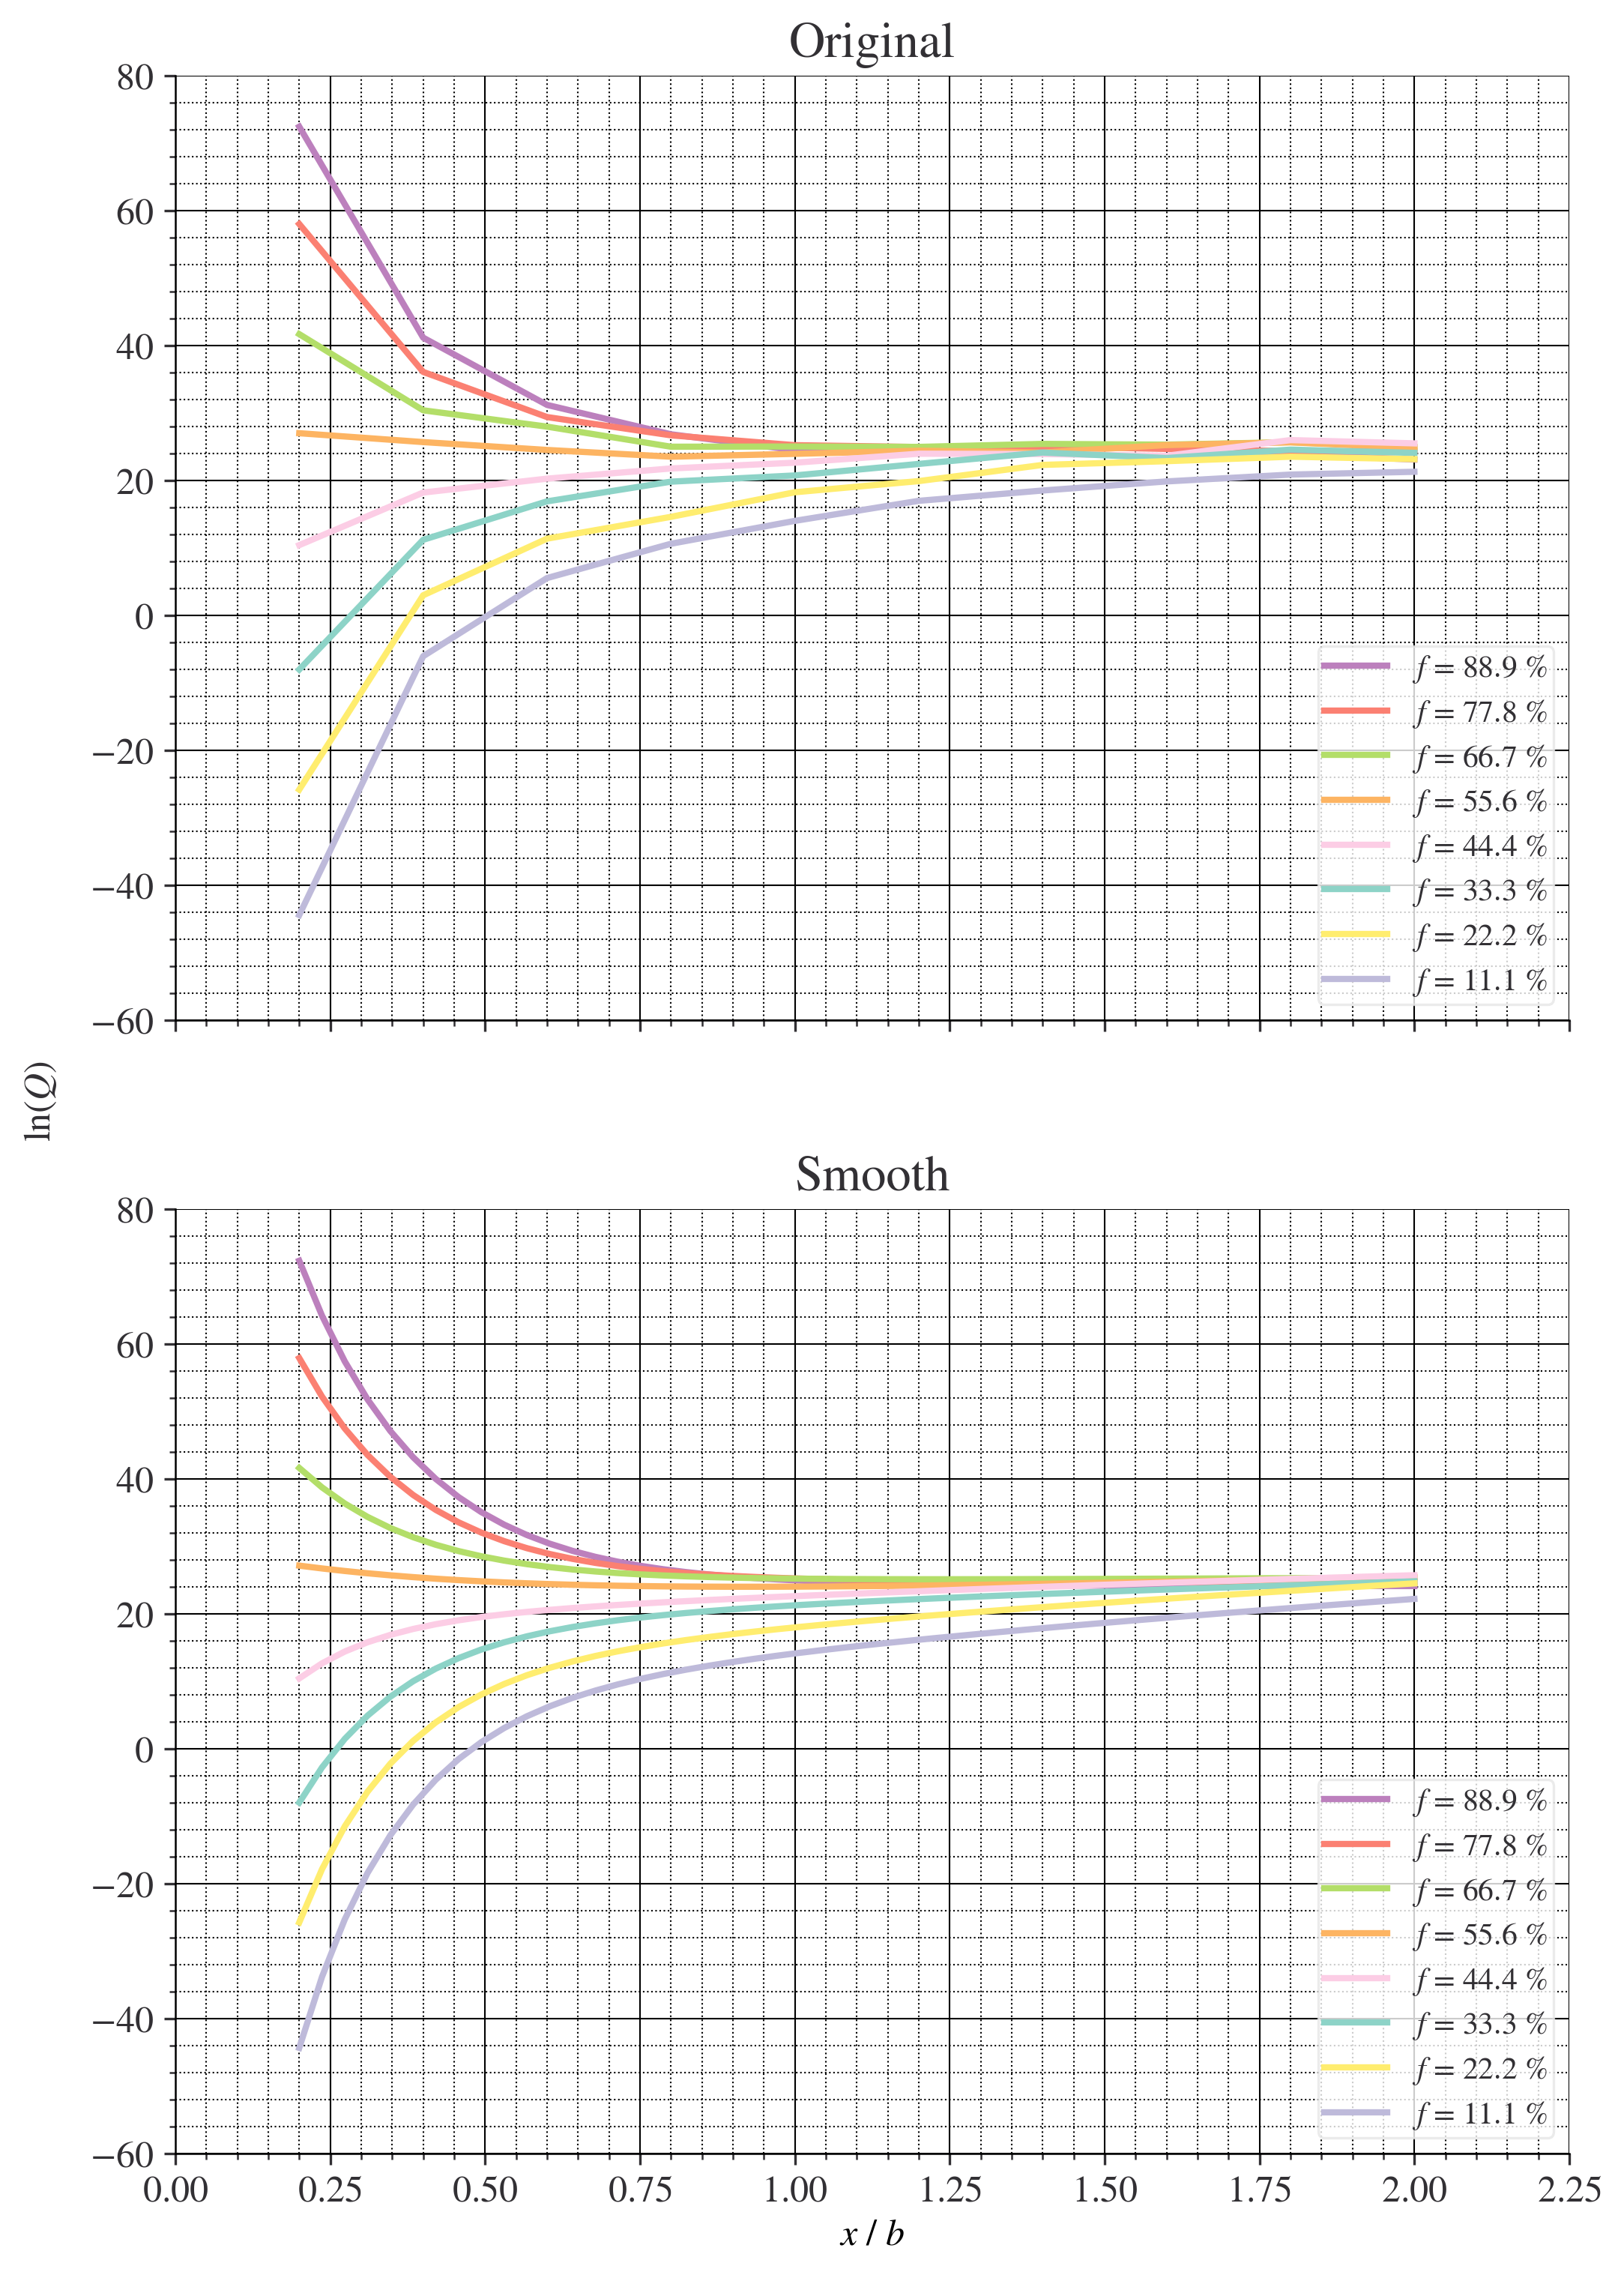

In [7]:
plt.close('all')
fig, ax = plt.subplots(2, figsize=(8, 12), sharex = True)
# fig.suptitle('Partition functions for various fractional occupancies $f$')
ax[0].set_title('Original')
ax[0].minorticks_on()
# Customize the major grid
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].yaxis.set_major_formatter(ScalarFormatter())
ax[0].yaxis.major.formatter._useMathText = True
ax[0].yaxis.set_minor_locator(  AutoMinorLocator(5))
ax[0].xaxis.set_minor_locator(  AutoMinorLocator(5))
for i in range(len(partitions)):
    ax[0].plot(distance[i], partitions[i], label = '$f$ = ' + str("{0:.3g}".format(((8 - i)/9*100))) + str(' %'))
ax[0].legend(loc = 'best')
ax[1].set_title('Smooth')
ax[1].minorticks_on()
# Customize the major grid
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[1].set_xlabel(r'$x ~ / ~ b$')
# ax[1].set_ylabel('Probability factor')
ax[1].yaxis.set_major_formatter(ScalarFormatter())
ax[1].yaxis.major.formatter._useMathText = True
ax[1].yaxis.set_minor_locator(  AutoMinorLocator(5))
ax[1].xaxis.set_minor_locator(  AutoMinorLocator(5))
for i in range(len(partitions)):
    ax[1].plot(smooth_distance[i], smooth_partitions[i], label = '$f$ = ' + str("{0:.3g}".format(((8 - i)/9*100))) + str(' %'))
ax[1].legend(loc = 'best')
# ax[1].set_xlim(1.5,3.6)
fig.text(0.04, 0.5, r'$\ln(Q)$', va='center', rotation='vertical', fontsize = 12)
plt.savefig("figures/frac_partitions.png")
plt.show()

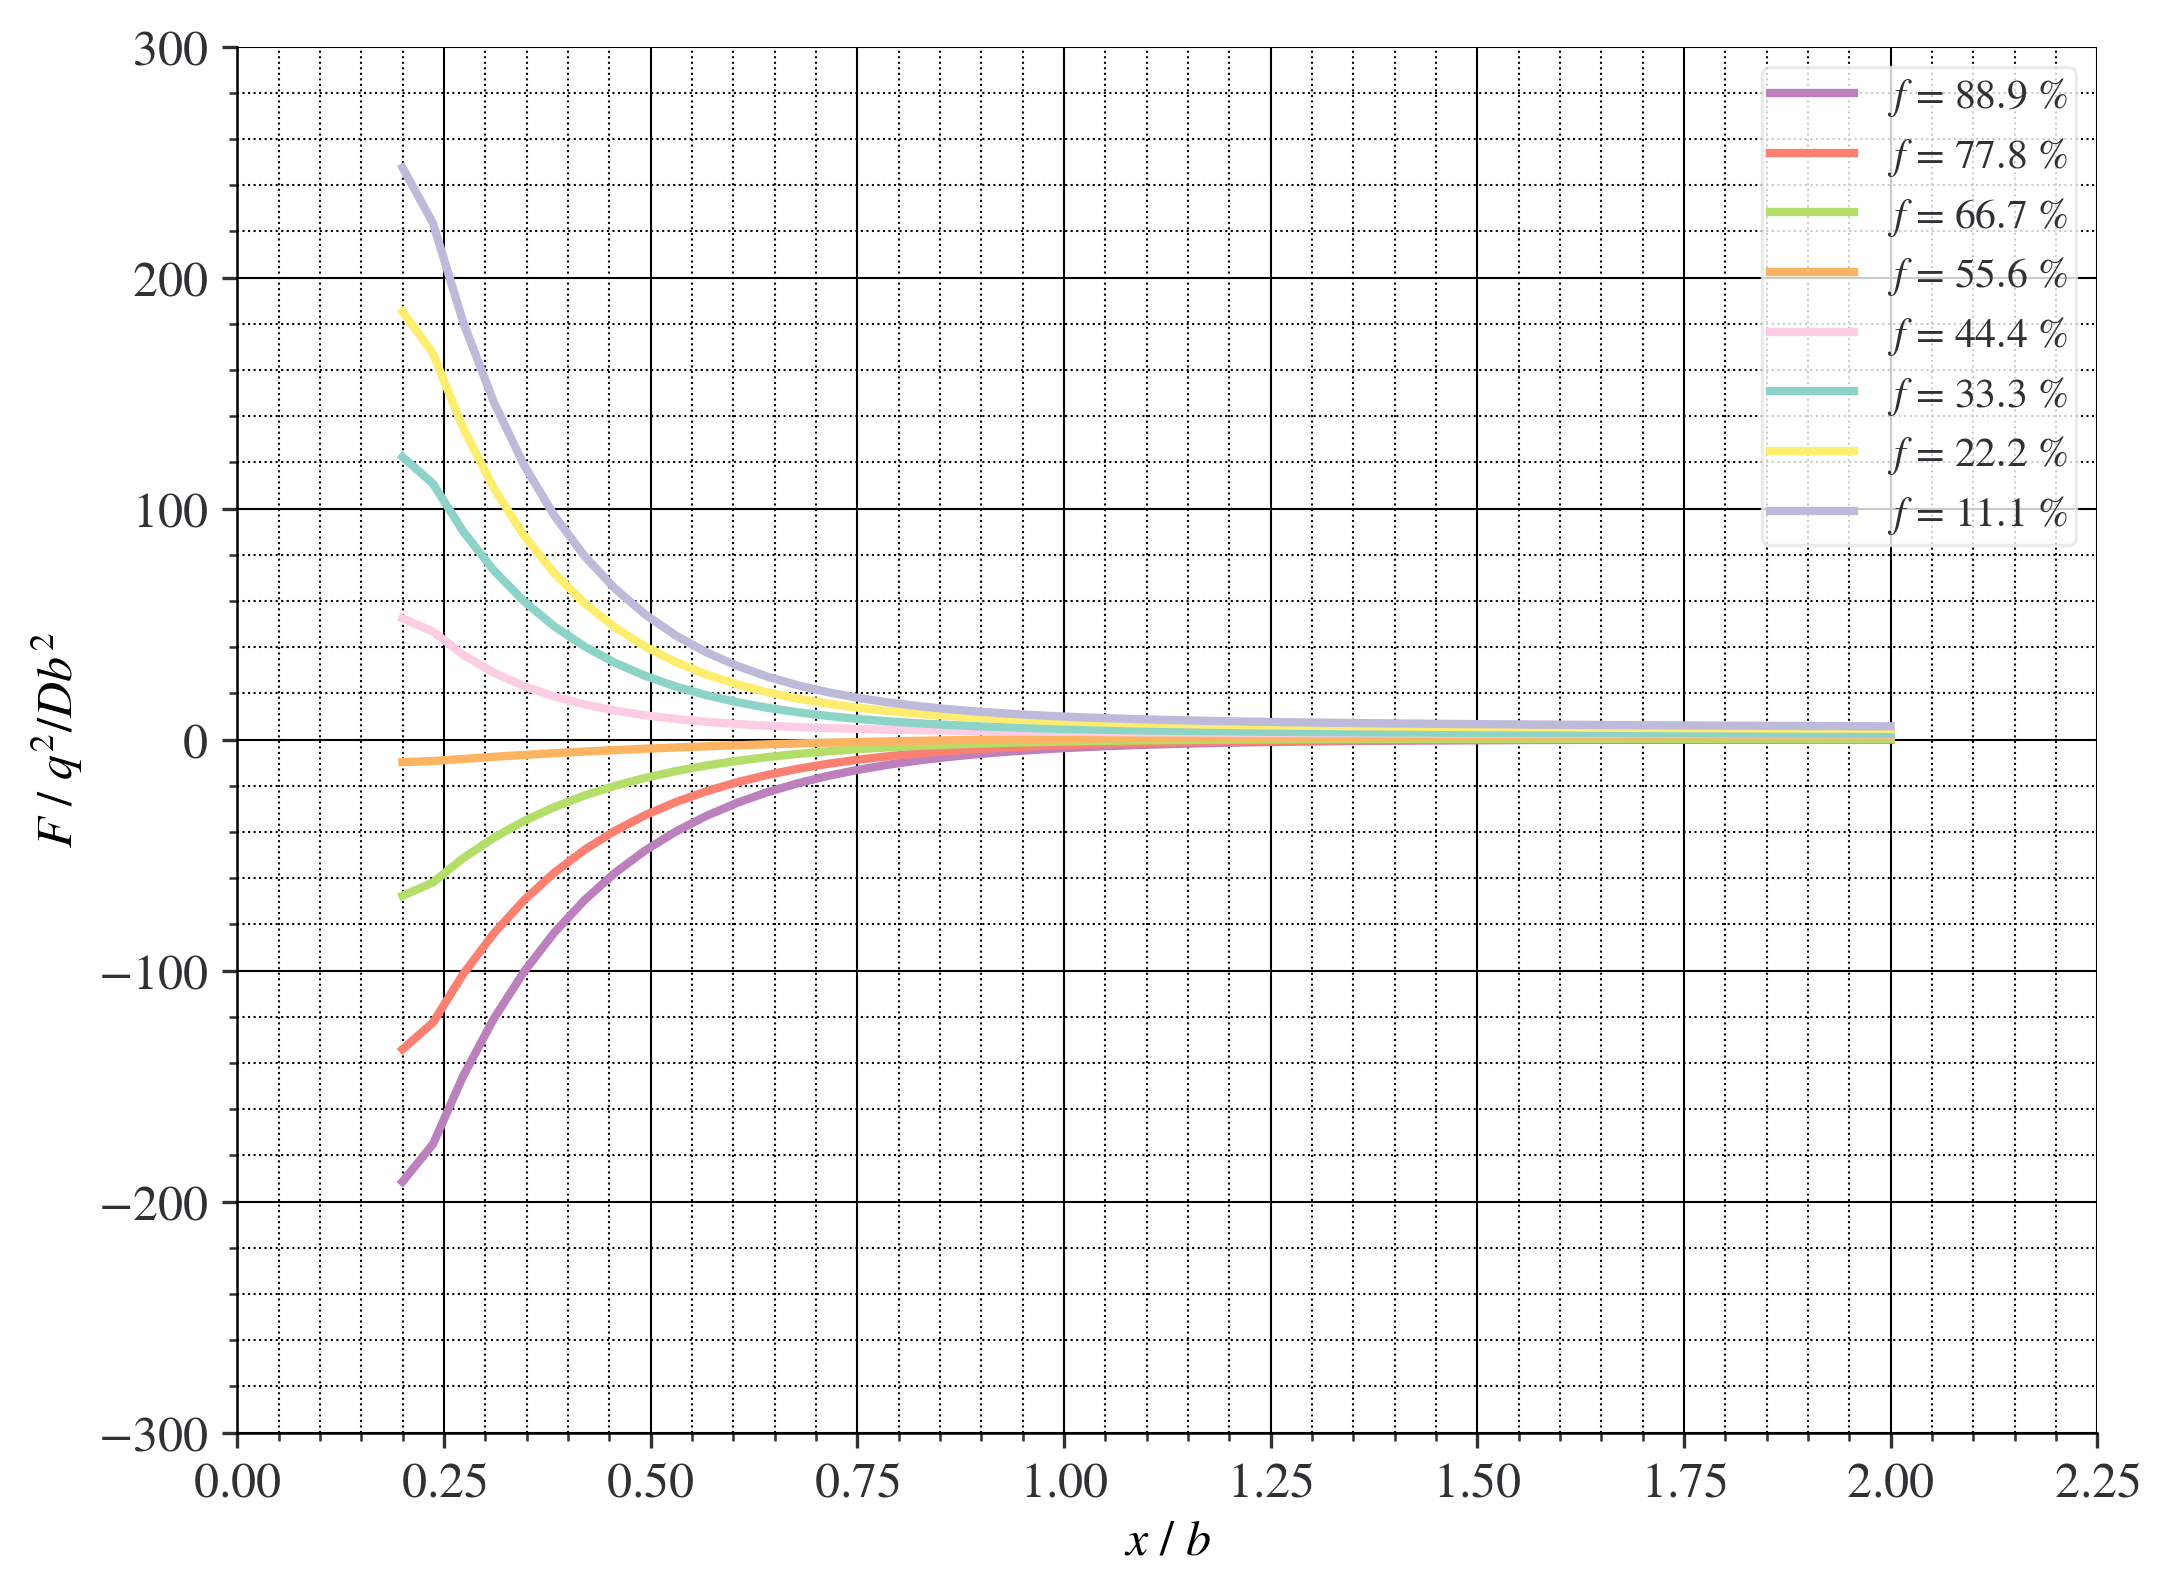

In [8]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8, 6))
# fig.suptitle('Forces for various fractional occupancies $f$')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
for i in range(len(partitions)):
    ax.plot(smooth_distance[i], forces[i], label = '$f$ = ' + str("{0:.3g}".format(((8 - i)/9*100))) + str(' %'))
ax.legend(loc = 'best')
ax.set_xlabel(r'$x ~ / ~ b$')
ax.set_ylabel(r'$F ~ / ~ q^2/Db^2$')
plt.savefig("figures/frac_forces.png")
plt.show()

Below is some analysis I did for the speed of convergence for a particular Monte Carlo case I ran.

In [9]:
t = np.load("data/t_testing_convergence.npy")
partitionstest = np.load("data/partitions_testing_convergence.npy")
iterations = np.load("data/iterations_testing_convergence.npy")

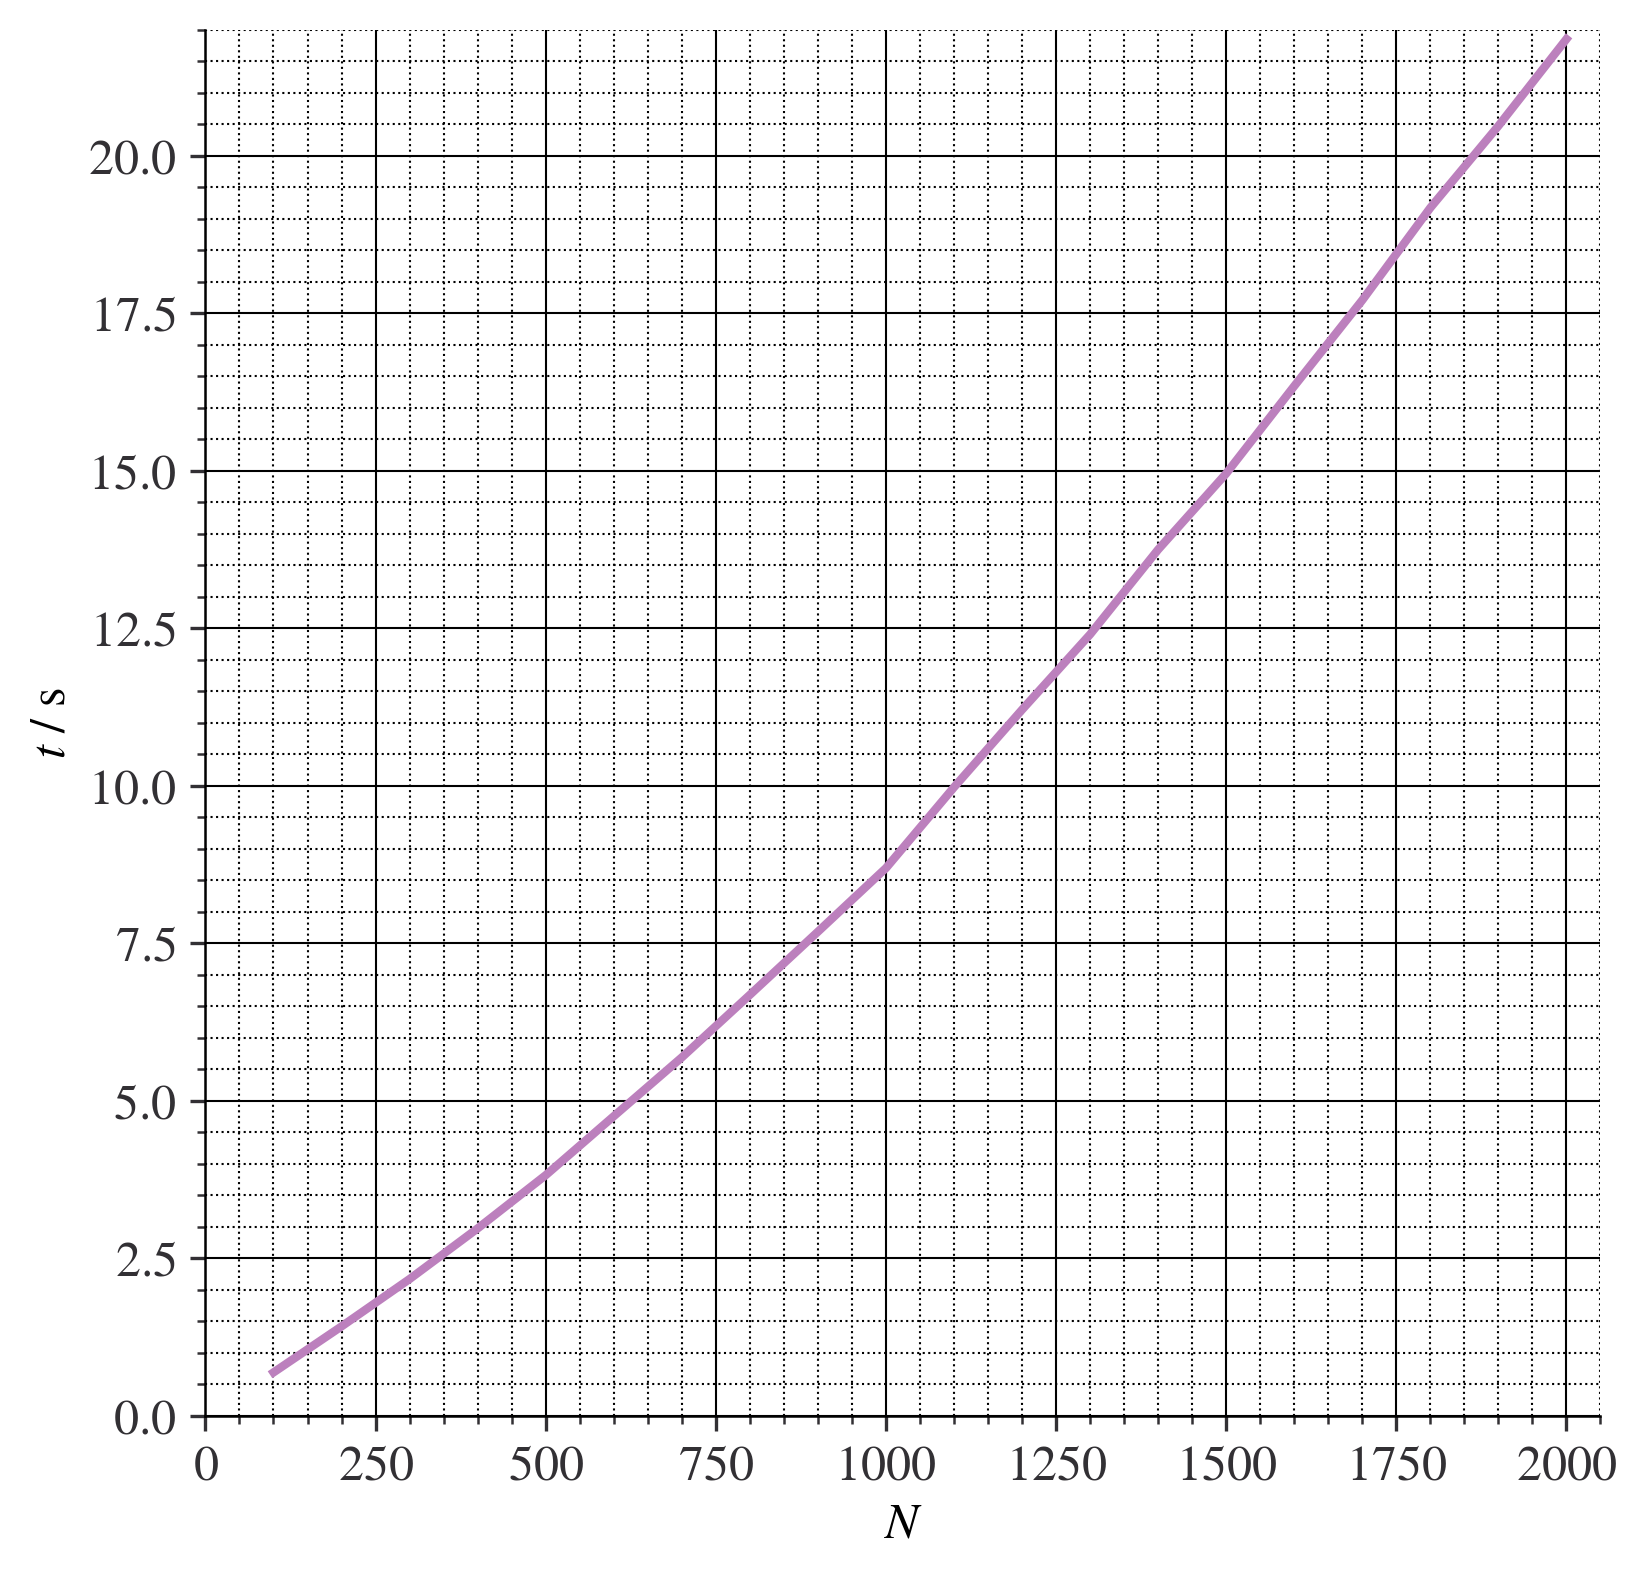

In [10]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 6))
# fig.suptitle('Forces for various fractional occupancies $f$')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.plot(iterations, t)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$t$ / s')
ax.set_xlim(0,2050)
ax.set_ylim(0,22)
plt.savefig("figures/t_convergence_test.png")
plt.show()

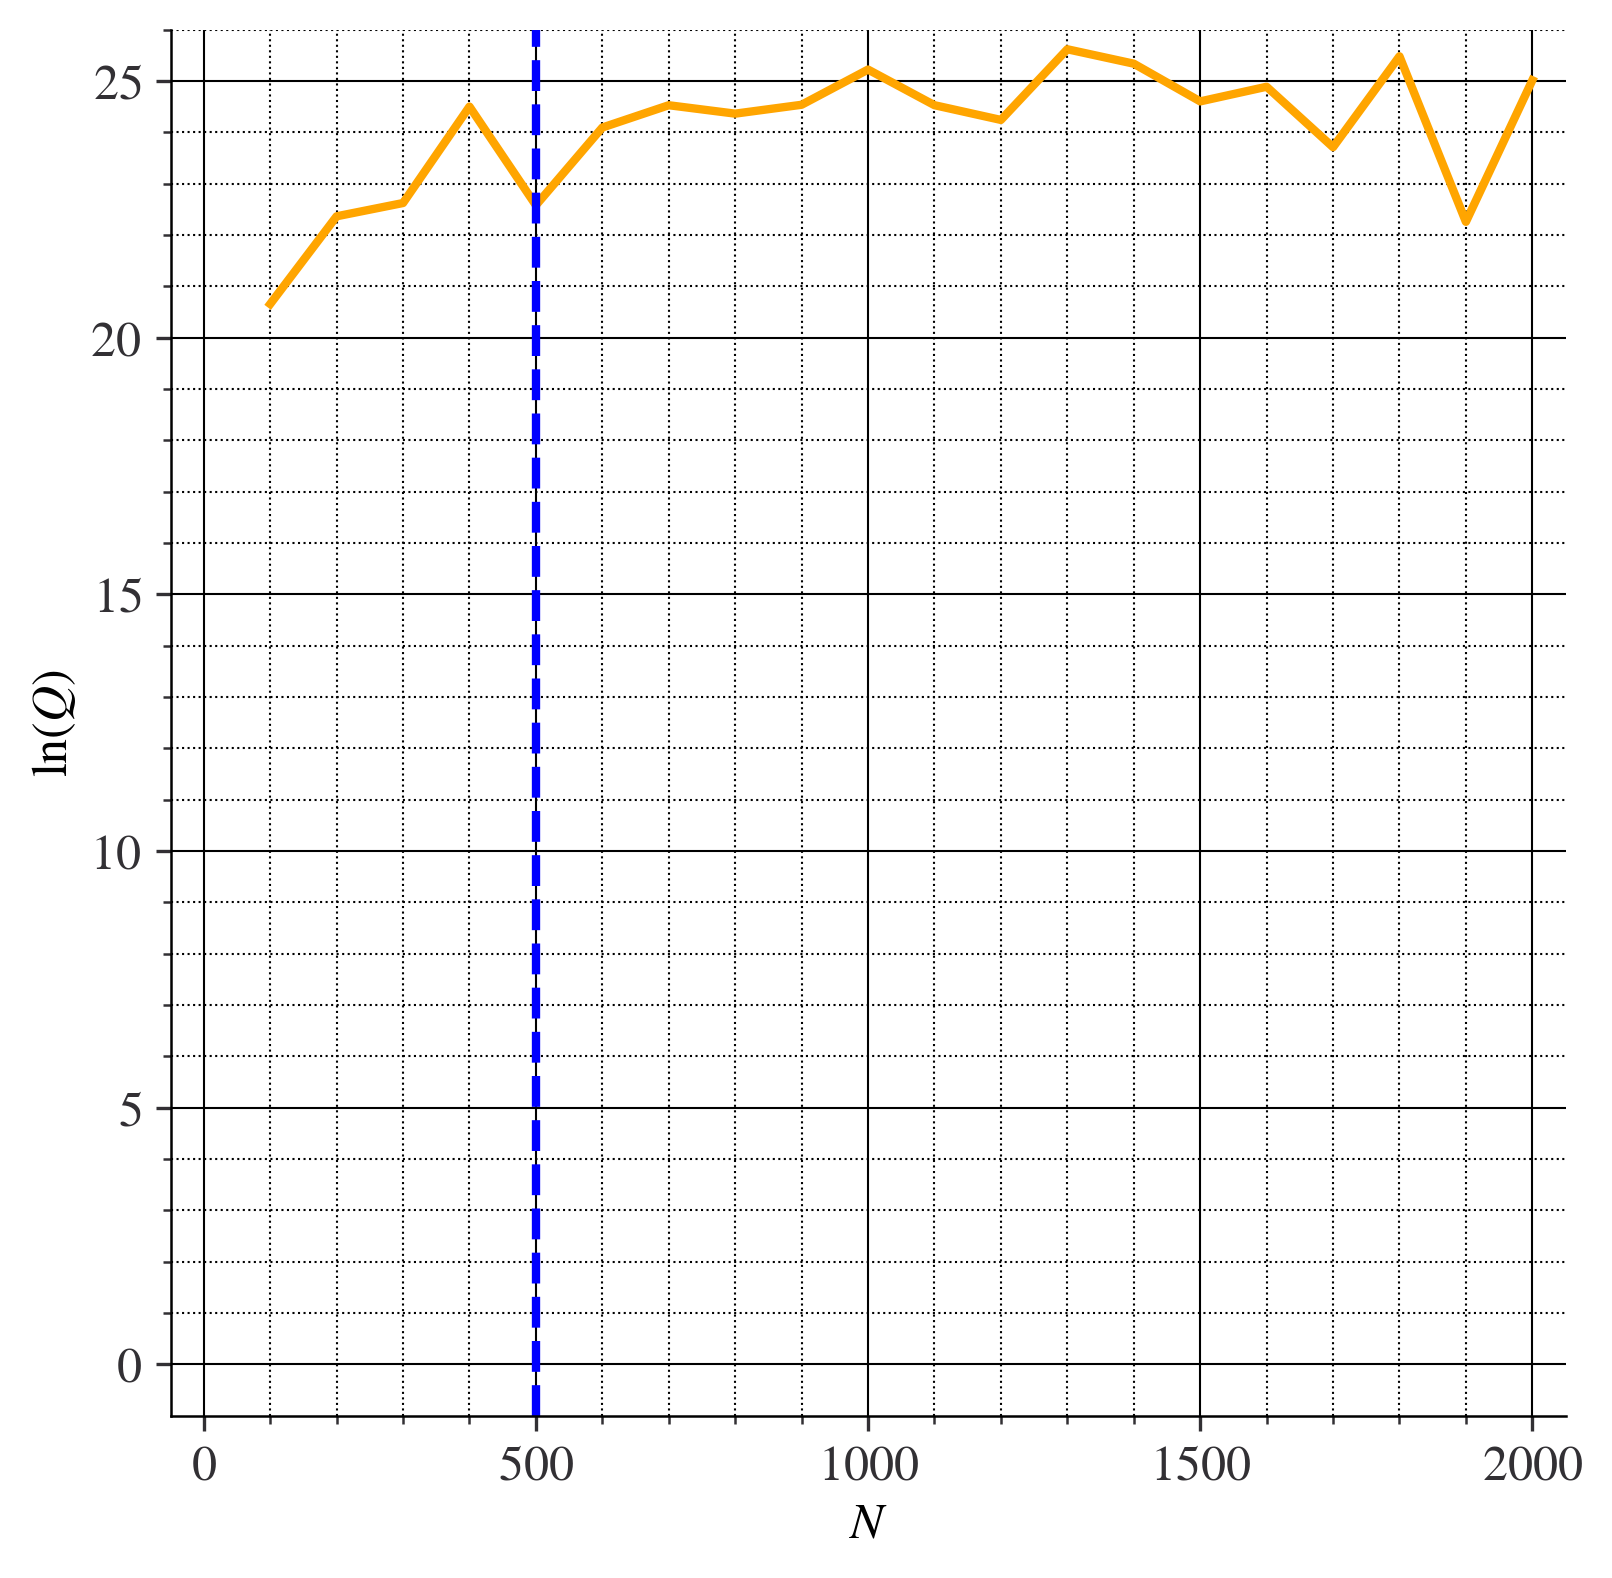

In [11]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 6))
# fig.suptitle('Forces for various fractional occupancies $f$')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.plot(iterations, partitionstest, color = 'orange')
ax.vlines(500, -1, 26, linestyle = 'dashed', linewidth = 2, color = 'blue')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\ln(Q)$')
ax.set_xlim(-50,2050)
ax.set_ylim(-1,26)
plt.savefig("figures/partitions_convergence_test.png")
plt.show()